In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from datetime import datetime


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, recall_score, f1_score, precision_score

# import several models
# Logistic Regression, Naive Bayes, KNN, Decision Tree, RandomForest, SVM, AdaBoost
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import label_binarize
from itertools import cycle


from xgboost import XGBClassifier
from sklearn.svm import SVC

# Disable warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load data
data = pd.read_csv('Sendo_reviews_cleaned.csv')
data.head()

,product_id,customer_id,full_name,created_time,rating,content,content_raw,positive_words_count,negative_words_count,positive_emojis_count,negative_emojis_count,positive,negative,rating_new,sentiment,length_text,temp_list
0,10119100,NguyenCatTuong,Nguyễn Cát Tường,20:22 | 21/12/2018,4,shop phục_vụ tốt,Shop phục vụ khá tốt.,1,0,0,0,1,0,5,positive,4,"['shop', 'phục_vụ', 'tốt']"
1,10119100,VuPhuong,Vũ Phương,15:00 | 10/12/2018,3,sản_phẩm mô_tả,Sản phẩm gần giống mô tả,1,0,0,0,1,0,4,positive,4,"['sản_phẩm', 'mô_tả']"
2,10119490,lienla,liên la,16:43 | 06/02/2021,5,hàng,Giao hàng nhanh bất ngờ.,1,0,0,0,1,0,6,positive,1,['hàng']
3,10119490,DoanHanh,Đoàn Hạnh,22:06 | 19/07/2020,4,sản_phẩm dịch_vụ,Sản phẩm/dịch vụ giống mô tả.,1,0,0,0,1,0,5,positive,4,"['sản_phẩm', 'dịch_vụ']"
4,10119490,Phamthuhoai,Phạm thu hoài,11:57 | 26/08/2019,5,sản_phẩm dịch_vụ mô_tả tốt chất_lượng sản_phẩm...,Sản phẩm/dịch vụ giống mô tả và tốt hơn mong đ...,7,0,0,0,7,0,6,positive,25,"['sản_phẩm', 'dịch_vụ', 'mô_tả', 'tốt', 'chất_..."


In [3]:
data = data.dropna()

In [4]:
data.sentiment.value_counts()

positive    4620
negative     356
neutral      152
Name: sentiment, dtype: int64

### Use CountVectorizer to create a document-term matrix

In [5]:
# Create a CountVectorizer object
count_vectorizer = CountVectorizer()

In [6]:
# Fit the CountVectorizer object to the data
count_vectorizer.fit(data['content'])

CountVectorizer()

In [7]:
# Get the size of the vocabulary
len(count_vectorizer.vocabulary_)

1623

In [8]:
# Transform the data
X = count_vectorizer.transform(data['content'])

In [9]:
df_new = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names_out())

In [10]:
df_new.sample(5)

,adjust,anyhow,babu,bime,buôn_bán,buồn,buồn_tý,buộc,bàn,bày_vẽ,...,ốc_vít,ốm,ống,ổ_điện,ổn,ổn_nhiên,ổn_tư,ủng,ủng_hộ,ứng_dụng
2763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_new, data['sentiment'], test_size=0.2, random_state=42)

In [12]:
y_test_bin = label_binarize(y_test, classes=['positive', 'neutral', 'negative'])
n_classes = y_test_bin.shape[1]

## Select model

* Trong bài toán này, áp dụng các model sau đây, so sánh kết quả và chọn model tốt nhất
    - NaiveBayes
    - LogisticRegression
    - DecisionTreeClassifier
    - RandomForestClassifier
    - GBTClassifier

In [13]:
def selected_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    t0 = datetime.now()
    model = model
    model_name=model.__class__.__name__
    print('**Model:**',model_name)
    print('_'*50)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall = round(recall_score(y_test,y_pred, average='micro'),2)
    precision = round(precision_score(y_test,y_pred, average='micro'),2)
    f1 = round(f1_score(y_test,y_pred, average='micro'),2)
    accuracy_train = round(accuracy_score(y_train, model.predict(X_train)),2)
    accuracy_test = round(accuracy_score(y_test, y_pred),2)
    end_time = datetime.now()
    run_time = end_time-t0
    
    print(model_name,"recall score:",recall)
    print(model_name,"precision score:",precision)
    print(model_name,"f1 score:",f1)
    print(model_name,'accuracy score on the test data:', accuracy_test)
    print(model_name,'accuracy score on the training data:', accuracy_train)
    print('*'*50)
    print(model_name,'Time taken:', run_time)
    print('*'*50)
    print('Classification report:\n', classification_report(y_test, y_pred))
    
    # Confusion matrix in a heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues');
    
    return y_pred, recall, precision,f1, accuracy_train, accuracy_test, run_time

In [14]:
# https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

In [15]:
def ROC_curve(model):
    model = model
    model_name=model.__class__.__name__
    print('ROC curve for', model_name)
    y_score = model.fit(X_train, y_train).predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
weights = {'positive':10, 'negative':54, 'neutral':36}

### 1/ NaiveBayes

**Model:** MultinomialNB
__________________________________________________


MultinomialNB recall score: 0.9
MultinomialNB precision score: 0.9
MultinomialNB f1 score: 0.9
MultinomialNB accuracy score on the test data: 0.9
MultinomialNB accuracy score on the training data: 0.93
**************************************************
MultinomialNB Time taken: 0:00:00.233423
**************************************************
Classification report:
               precision    recall  f1-score   support

    negative       0.54      0.67      0.60        81
     neutral       0.13      0.06      0.08        33
    positive       0.95      0.95      0.95       912

    accuracy                           0.90      1026
   macro avg       0.54      0.56      0.54      1026
weighted avg       0.89      0.90      0.90      1026



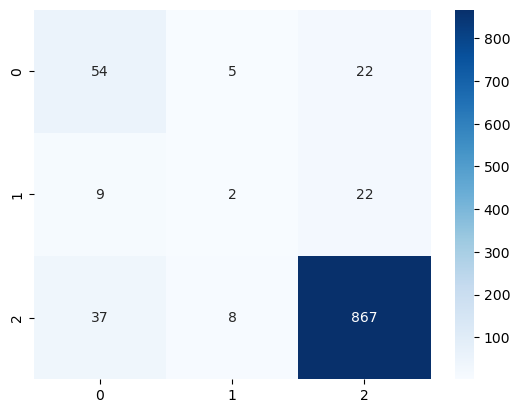

In [17]:
y_pred_nb, recall_nb, precision_nb, f1_nb, accuracy_train_nb, accuracy_test_nb, time_nb = selected_model(MultinomialNB())

ROC curve for MultinomialNB


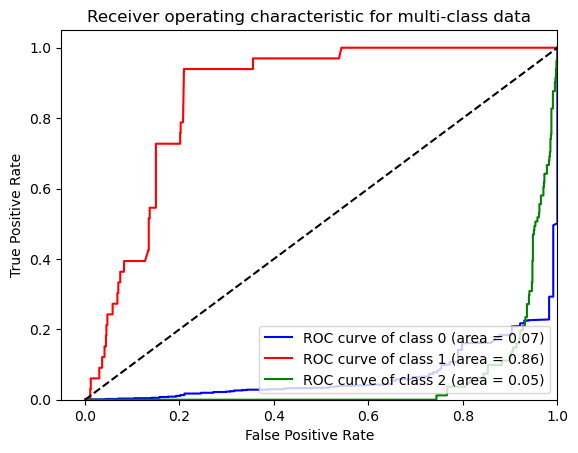

In [18]:
ROC_curve(MultinomialNB())

### 2/ Logistic Regression

**Model:** LogisticRegression
__________________________________________________
LogisticRegression recall score: 0.85
LogisticRegression precision score: 0.85
LogisticRegression f1 score: 0.85
LogisticRegression accuracy score on the test data: 0.85
LogisticRegression accuracy score on the training data: 0.89
**************************************************
LogisticRegression Time taken: 0:00:00.689565
**************************************************
Classification report:
               precision    recall  f1-score   support

    negative       0.42      0.69      0.52        81
     neutral       0.27      0.70      0.39        33
    positive       0.98      0.87      0.92       912

    accuracy                           0.85      1026
   macro avg       0.56      0.75      0.61      1026
weighted avg       0.92      0.85      0.87      1026



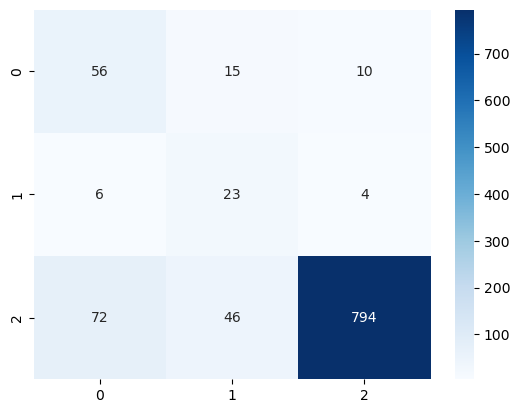

In [19]:
y_pred_lgr, recall_lgr, precision_lgr, f1_lgr, accuracy_train_lgr, accuracy_test_lgr, time_lgr = selected_model(LogisticRegression(class_weight='balanced'))

ROC curve for LogisticRegression


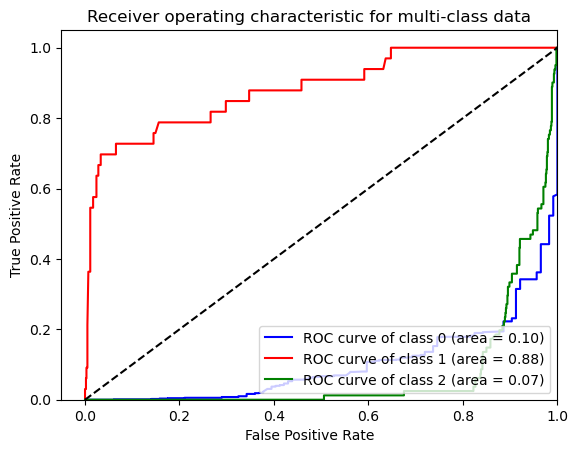

In [20]:
ROC_curve(LogisticRegression(class_weight='balanced'))

### 3/ Decision Tree Classifier

**Model:** DecisionTreeClassifier
__________________________________________________
DecisionTreeClassifier recall score: 0.89
DecisionTreeClassifier precision score: 0.89
DecisionTreeClassifier f1 score: 0.89
DecisionTreeClassifier accuracy score on the test data: 0.89
DecisionTreeClassifier accuracy score on the training data: 0.97
**************************************************
DecisionTreeClassifier Time taken: 0:00:00.476283
**************************************************
Classification report:
               precision    recall  f1-score   support

    negative       0.44      0.57      0.49        81
     neutral       0.43      0.61      0.50        33
    positive       0.96      0.92      0.94       912

    accuracy                           0.89      1026
   macro avg       0.61      0.70      0.65      1026
weighted avg       0.91      0.89      0.89      1026



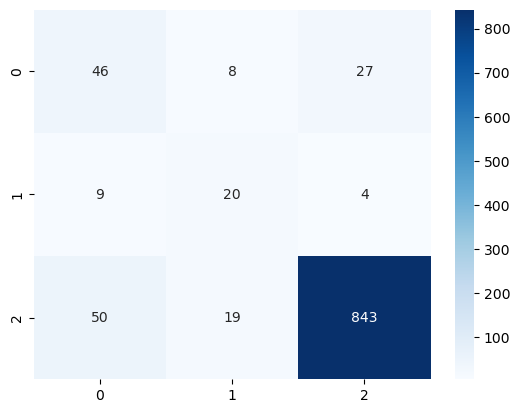

In [21]:
y_pred_dt, recall_dt, precision_dt, f1_dt, accuracy_train_dt, accuracy_test_dt, time_dt = selected_model(DecisionTreeClassifier(class_weight='balanced'))

ROC curve for DecisionTreeClassifier


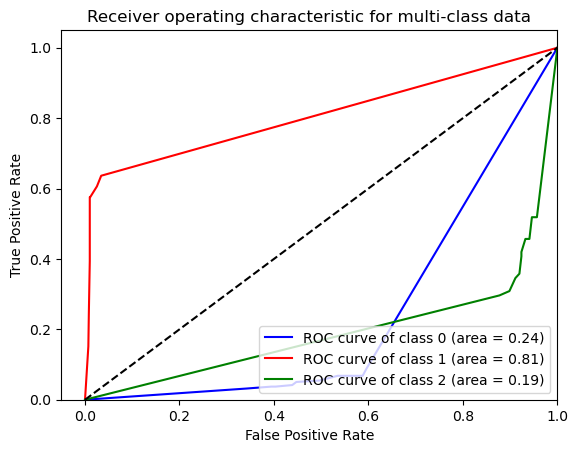

In [22]:
ROC_curve(DecisionTreeClassifier(class_weight='balanced'))

### 4/ RandomForestClassifier

**Model:** RandomForestClassifier
__________________________________________________
RandomForestClassifier recall score: 0.91
RandomForestClassifier precision score: 0.91
RandomForestClassifier f1 score: 0.91
RandomForestClassifier accuracy score on the test data: 0.91
RandomForestClassifier accuracy score on the training data: 0.97
**************************************************
RandomForestClassifier Time taken: 0:00:03.724754
**************************************************
Classification report:
               precision    recall  f1-score   support

    negative       0.54      0.54      0.54        81
     neutral       0.60      0.55      0.57        33
    positive       0.96      0.96      0.96       912

    accuracy                           0.91      1026
   macro avg       0.70      0.68      0.69      1026
weighted avg       0.91      0.91      0.91      1026



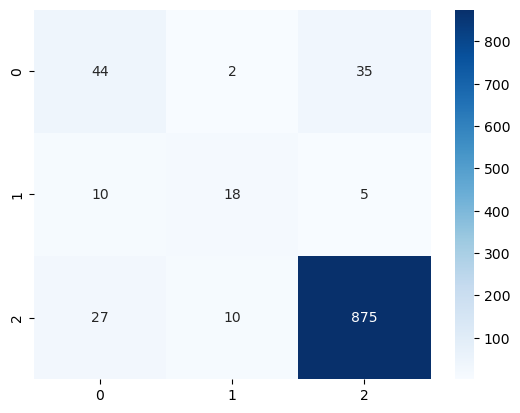

In [23]:
y_pred_rf, recall_rf, precision_rf, f1_rf, accuracy_train_rf, accuracy_test_rf, time_rf = selected_model(RandomForestClassifier(class_weight='balanced'))

ROC curve for RandomForestClassifier


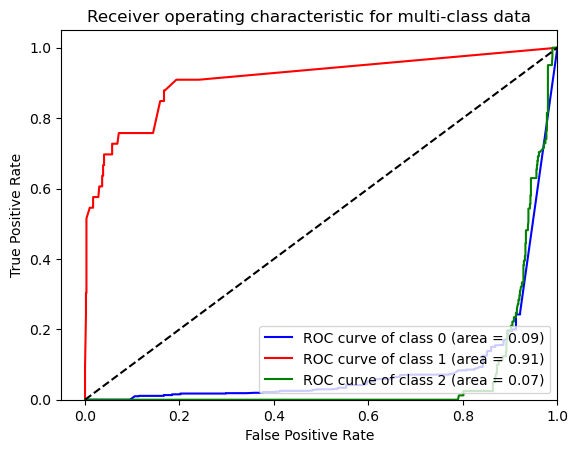

In [24]:
ROC_curve(RandomForestClassifier(class_weight='balanced'))

### 5/ GBTClassifier

**Model:** GradientBoostingClassifier
__________________________________________________
GradientBoostingClassifier recall score: 0.9
GradientBoostingClassifier precision score: 0.9
GradientBoostingClassifier f1 score: 0.9
GradientBoostingClassifier accuracy score on the test data: 0.9
GradientBoostingClassifier accuracy score on the training data: 0.94
**************************************************
GradientBoostingClassifier Time taken: 0:01:30.522460
**************************************************
Classification report:
               precision    recall  f1-score   support

    negative       0.65      0.25      0.36        81
     neutral       0.33      0.03      0.06        33
    positive       0.91      0.99      0.95       912

    accuracy                           0.90      1026
   macro avg       0.63      0.42      0.45      1026
weighted avg       0.87      0.90      0.87      1026



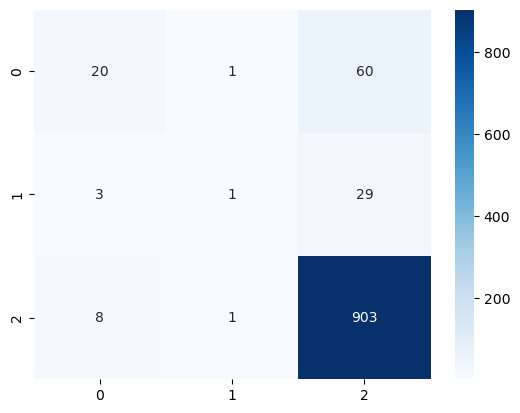

In [25]:
y_pred_gbt, recall_gbt, precision_gbt, f1_gbt, accuracy_train_gbt, accuracy_test_gbt, time_gbt = selected_model(GradientBoostingClassifier())

ROC curve for GradientBoostingClassifier


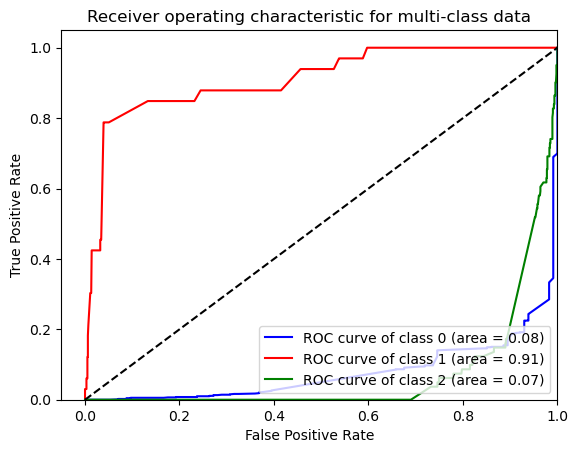

In [26]:
ROC_curve(GradientBoostingClassifier())

### K-folds

In [27]:
#Create a list of models 
models = [
    LogisticRegression(max_iter=10000, class_weight='balanced'),
    MultinomialNB(),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(n_estimators=50, class_weight='balanced'),
    RandomForestClassifier(n_estimators=200, class_weight='balanced'),
    GradientBoostingClassifier()
]

In [28]:
def get_model_name(model):
    model_name=model.__class__.__name__
    if model_name=='KNeighborsClassifier':
        model_name=model_name+'_'+str(model.n_neighbors)
    elif model_name=='RandomForestClassifier':
        model_name=model_name+'_'+str(model.n_estimators)
    elif model_name=='SVC':
        model_name=model_name+'_'+model.kernel
    return model_name

In [29]:
#Number of folds
n_folds = 10
#Dataframe to store the results
model_selection = pd.DataFrame(columns=['model_name', 'mean_accuracy', 'std_accuracy','time'])

for model in models:
    model_name = get_model_name(model)
    print(model_name)
    #Record the start time:
    start_time = datetime.now()
    #Perform the cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy',n_jobs=-1)
    #Record the end time
    end_time = datetime.now()
    # Calculate the time token
    time_token = end_time - start_time
    #Store the results
    model_selection = model_selection._append({'model_name':model_name,
                                              'mean_accuracy':scores.mean(),
                                              'std_accuracy':scores.std(),
                                              'time':time_token},ignore_index=True)

LogisticRegression


MultinomialNB
DecisionTreeClassifier
RandomForestClassifier_50
RandomForestClassifier_200
GradientBoostingClassifier


In [30]:
model_selection.sort_values(by='mean_accuracy',ascending=False,inplace=True)
model_selection.reset_index(drop=True,inplace=True)

In [31]:
model_selection

,model_name,mean_accuracy,std_accuracy,time
0,GradientBoostingClassifier,0.916139,0.005465,0 days 00:02:48.591154
1,RandomForestClassifier_50,0.911501,0.009431,0 days 00:00:03.348845
2,RandomForestClassifier_200,0.910039,0.010749,0 days 00:00:11.141938
3,MultinomialNB,0.905411,0.008009,0 days 00:00:03.137967
4,DecisionTreeClassifier,0.894928,0.009229,0 days 00:00:01.040698
5,LogisticRegression,0.847633,0.011873,0 days 00:00:06.566472


### So sánh các mô hình

In [32]:
compare_model = pd.DataFrame(columns=['Model_name', 'Recall_score', 'Precision_score', 'F1_score',
                                      'Train_accuracy', 'Test_accuracy','Time'])

In [33]:
# Naive Bayes
compare_model = compare_model._append({'Model_name': 'Naive Bayes',
                                            'Recall_score':recall_nb,
                                            'Precision_score':precision_nb,
                                            'F1_score':f1_nb,
                                            'Train_accuracy':accuracy_train_nb,
                                            'Test_accuracy':accuracy_test_nb,
                                            'Time': time_nb},ignore_index=True)
# LogisticRegression
compare_model = compare_model._append({'Model_name': 'Logistic Regression',
                                            'Recall_score':recall_lgr,
                                            'Precision_score':precision_lgr,
                                            'F1_score':f1_lgr,
                                            'Train_accuracy':accuracy_train_lgr,
                                            'Test_accuracy':accuracy_test_lgr,
                                            'Time': time_lgr},ignore_index=True)
# DecisionTreeClassifier
compare_model = compare_model._append({'Model_name': 'Decision Tree Classifier',
                                            'Recall_score':recall_dt,
                                            'Precision_score':precision_dt,
                                            'F1_score':f1_dt,
                                            'Train_accuracy':accuracy_train_dt,
                                            'Test_accuracy':accuracy_test_dt,
                                            'Time': time_dt},ignore_index=True)
# Random Forest Classifier
compare_model = compare_model._append({'Model_name': 'Random Forest Classifier',
                                            'Recall_score':recall_rf,
                                            'Precision_score':precision_rf,
                                            'F1_score':f1_rf,
                                            'Train_accuracy':accuracy_train_rf,
                                            'Test_accuracy':accuracy_test_rf,
                                            'Time': time_rf},ignore_index=True)
# GBT Classifier
compare_model = compare_model._append({'Model_name': 'GBT Classifier',
                                            'Recall_score':recall_gbt,
                                            'Precision_score':precision_gbt,
                                            'F1_score':f1_gbt,
                                            'Train_accuracy':accuracy_train_gbt,
                                            'Test_accuracy':accuracy_test_gbt,
                                            'Time': time_gbt},ignore_index=True)

In [34]:
compare_model.sort_values(by='Train_accuracy',ascending=False,inplace=True)
compare_model.reset_index(drop=True,inplace=True)
compare_model

,Model_name,Recall_score,Precision_score,F1_score,Train_accuracy,Test_accuracy,Time
0,Decision Tree Classifier,0.89,0.89,0.89,0.97,0.89,0 days 00:00:00.476283
1,Random Forest Classifier,0.91,0.91,0.91,0.97,0.91,0 days 00:00:03.724754
2,GBT Classifier,0.90,0.90,0.90,0.94,0.90,0 days 00:01:30.522460
3,Naive Bayes,0.90,0.90,0.90,0.93,0.90,0 days 00:00:00.233423
4,Logistic Regression,0.85,0.85,0.85,0.89,0.85,0 days 00:00:00.689565


In [35]:
compare_model.style.background_gradient(cmap='Greens')

,Model_name,Recall_score,Precision_score,F1_score,Train_accuracy,Test_accuracy,Time
0,Decision Tree Classifier,0.890000,0.890000,0.890000,0.970000,0.890000,0 days 00:00:00.476283
1,Random Forest Classifier,0.910000,0.910000,0.910000,0.970000,0.910000,0 days 00:00:03.724754
2,GBT Classifier,0.900000,0.900000,0.900000,0.940000,0.900000,0 days 00:01:30.522460
3,Naive Bayes,0.900000,0.900000,0.900000,0.930000,0.900000,0 days 00:00:00.233423
4,Logistic Regression,0.850000,0.850000,0.850000,0.890000,0.850000,0 days 00:00:00.689565


In [36]:
model_selection.style.background_gradient(cmap='Blues')

,model_name,mean_accuracy,std_accuracy,time
0,GradientBoostingClassifier,0.916139,0.005465,0 days 00:02:48.591154
1,RandomForestClassifier_50,0.911501,0.009431,0 days 00:00:03.348845
2,RandomForestClassifier_200,0.910039,0.010749,0 days 00:00:11.141938
3,MultinomialNB,0.905411,0.008009,0 days 00:00:03.137967
4,DecisionTreeClassifier,0.894928,0.009229,0 days 00:00:01.040698
5,LogisticRegression,0.847633,0.011873,0 days 00:00:06.566472


Text(0.5, 1.0, 'Model Comparison')

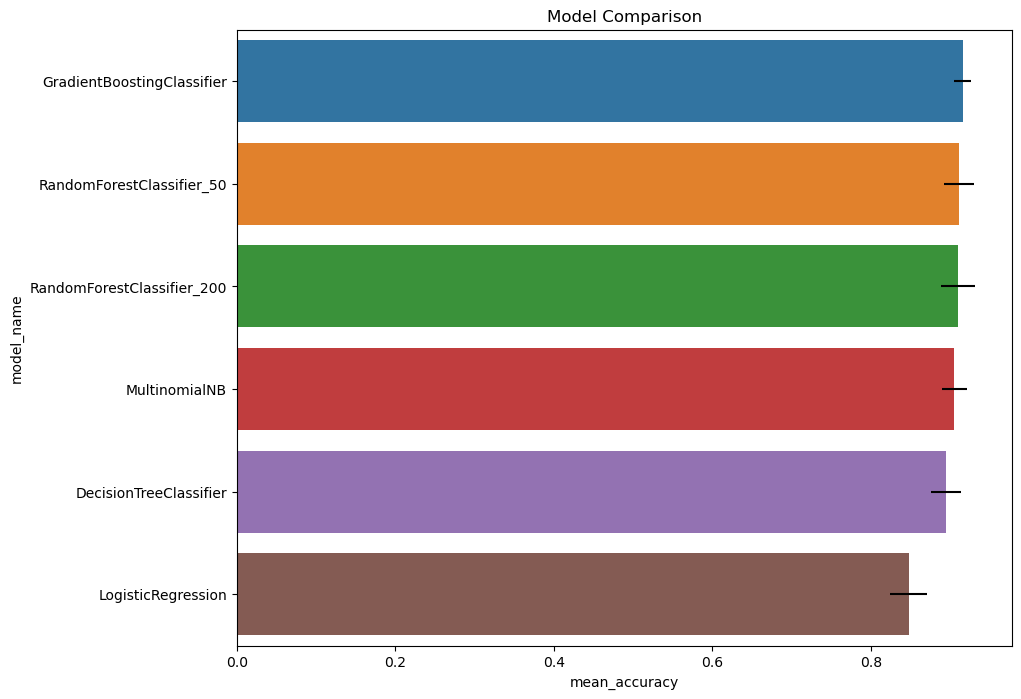

In [37]:
plt.figure(figsize=(10, 8))
sns.barplot(x='mean_accuracy', y='model_name', data=model_selection, xerr=model_selection['std_accuracy'] * 2, capsize=0.1)
plt.title('Model Comparison')

**Nhận xét:**
* Từ các kết quả ở trên có thể thấy Decision Tree và Random Forest là 2 mô hình có accuracy cao nhất
* Tuy nhiên, sau khi áp dụng cross-validation, mô hình GBT và Random Forest có mean_accuracy cao nhất
* Đối với các chỉ số recall, precision và f1 áp dụng micro (các class có mức độ quan trọng như nhau), Random Forest có tỷ lệ cao nhất.
* Vì vậy, lựa chọn Random Forest bài toán này vì độ chính xác cao, độ dao động giữa các lần thử khá thấp và chênh lệch giữa accuracy giữa train và test thấp

## Áp dụng Random Forest

In [38]:
model = RandomForestClassifier(n_estimators=50, class_weight='balanced')

In [39]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [40]:
# Create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=50, class_weight='balanced'),
                           param_grid, cv=n_folds,scoring='accuracy',n_jobs=-1,verbose=1)
start_time = datetime.now()
grid_search.fit(X_train,y_train)
end_time = datetime.now()

print('Time taken:', end_time-start_time)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


Time taken: 0:04:32.505113


In [41]:
# Print the best parameters?
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [49]:
best_model = RandomForestClassifier(n_estimators=500, class_weight='balanced', criterion='gini',
                                   max_depth=8, max_features='auto')

**Model:** RandomForestClassifier
__________________________________________________
RandomForestClassifier recall score: 0.91
RandomForestClassifier precision score: 0.91
RandomForestClassifier f1 score: 0.91
RandomForestClassifier accuracy score on the test data: 0.91
RandomForestClassifier accuracy score on the training data: 0.97
**************************************************
RandomForestClassifier Time taken: 0:00:01.488457
**************************************************
Classification report:
               precision    recall  f1-score   support

    negative       0.53      0.54      0.54        81
     neutral       0.58      0.55      0.56        33
    positive       0.96      0.96      0.96       912

    accuracy                           0.91      1026
   macro avg       0.69      0.68      0.69      1026
weighted avg       0.91      0.91      0.91      1026



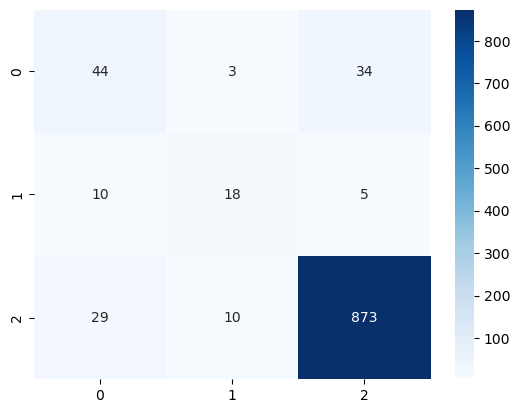

In [50]:
y_pred, recall, precision, f1, accuracy_train, accuracy_test, time = selected_model(model)

ROC curve for RandomForestClassifier


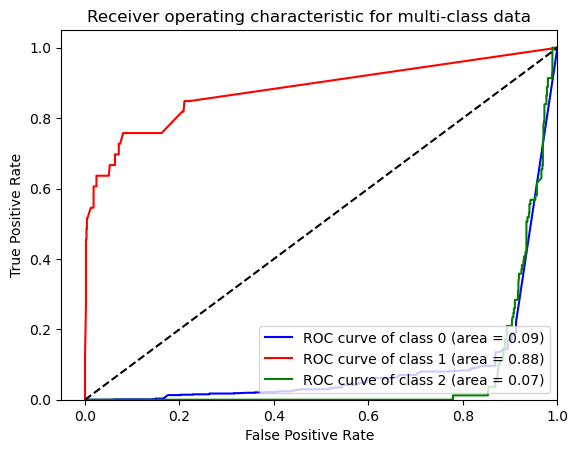

In [51]:
ROC_curve(model)

### Save and load the model

In [52]:
# import pickle

In [46]:
# pickle.dump(best_model,open('best_model.pkl','wb'))

In [47]:
# model = pickle.load(open('best_model.pkl','rb'))

In [48]:
# # # Accuracy of training and testing
# print('Accuracy on training set:',best_model.score(X_train, y_train))
# print('Accuracy on testing set:',best_model.score(X_test, y_test))